In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

df = pd.read_csv("../data/ref_data.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,target
0,0.035383,0.682562,0.631392,0.604122,0.593008,0.606561,0.541665,0.490245,0.541293,0.602763,...,0.000008,0.000010,0.000016,0.000037,0.000045,0.000034,0.000016,0.000007,7.018234e-07,N
1,0.171621,0.773267,0.720554,0.698526,0.675677,0.649336,0.561003,0.566162,0.627939,0.706442,...,0.000611,0.000619,0.000651,0.000671,0.000714,0.000662,0.000632,0.000636,6.285412e-04,N
2,0.036989,0.581158,0.648372,0.665474,0.574450,0.527603,0.569063,0.568006,0.440939,0.413963,...,0.000005,0.000005,0.000005,0.000002,0.000001,0.000001,0.000002,0.000002,3.452211e-07,N
3,0.069629,0.589378,0.541421,0.541959,0.586754,0.491672,0.464231,0.533424,0.623905,0.748939,...,0.000565,0.000386,0.000424,0.000616,0.000660,0.000487,0.000254,0.000090,5.960710e-06,N
4,0.170729,0.650319,0.608939,0.607158,0.633005,0.584595,0.527609,0.540251,0.621838,0.760092,...,0.000643,0.000473,0.000515,0.000710,0.000755,0.000571,0.000324,0.000174,8.189615e-05,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.177409,0.685879,0.688923,0.692181,0.695660,0.732018,0.726838,0.699215,0.664477,0.703567,...,0.003476,0.004130,0.003975,0.003647,0.003759,0.003958,0.003687,0.002704,2.190249e-03,P
1298,0.060417,0.741477,0.846064,0.677123,0.540445,0.546407,0.503164,0.497387,0.624307,0.665305,...,0.000683,0.000667,0.000452,0.000225,0.000215,0.000398,0.000448,0.000251,1.651544e-05,P
1299,0.061669,0.701292,0.650403,0.600404,0.643707,0.584001,0.512437,0.559121,0.596951,0.596030,...,0.000926,0.001583,0.002262,0.002180,0.001111,0.000833,0.001007,0.000629,4.519488e-05,P
1300,0.135363,0.732490,0.698547,0.730017,0.733110,0.664281,0.611099,0.649955,0.633053,0.671104,...,0.001099,0.001785,0.002457,0.002369,0.001336,0.001035,0.001215,0.000796,2.439616e-04,P


In [7]:
import fct_model
import importlib
importlib.reload(fct_model)

X, Y, encoder, scaler = fct_model.preprocess_data(df)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, stratify=Y, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1041, 162, 1), (1041, 7), (261, 162, 1), (261, 7))

In [9]:
cnn = fct_model.define_model(x_train.shape[1])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 162, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 162, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 373,831 (1.43 MB)

 Trainable params: 373,831 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_train, history = fct_model.train_model(x_train, y_train, x_test, y_test, cnn)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1989 - loss: 1.9338 - val_accuracy: 0.2452 - val_loss: 1.8588 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3332 - loss: 1.7749 - val_accuracy: 0.3065 - val_loss: 1.7275 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3278 - loss: 1.7122 - val_accuracy: 0.3640 - val_loss: 1.6251 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4323 - loss: 1.5246 - val_accuracy: 0.3716 - val_loss: 1.5560 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4731 - loss: 1.4127 - val_accuracy: 0.3946 - val_loss: 1.4825 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5070 - loss: 1.3200 - val_accuracy: 0.4598 - val_loss: 1.4635 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5946 - loss: 1.2047 - val_acc

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6632 - loss: 1.3672
Accuracy of our model on test data :  63.98467421531677 %


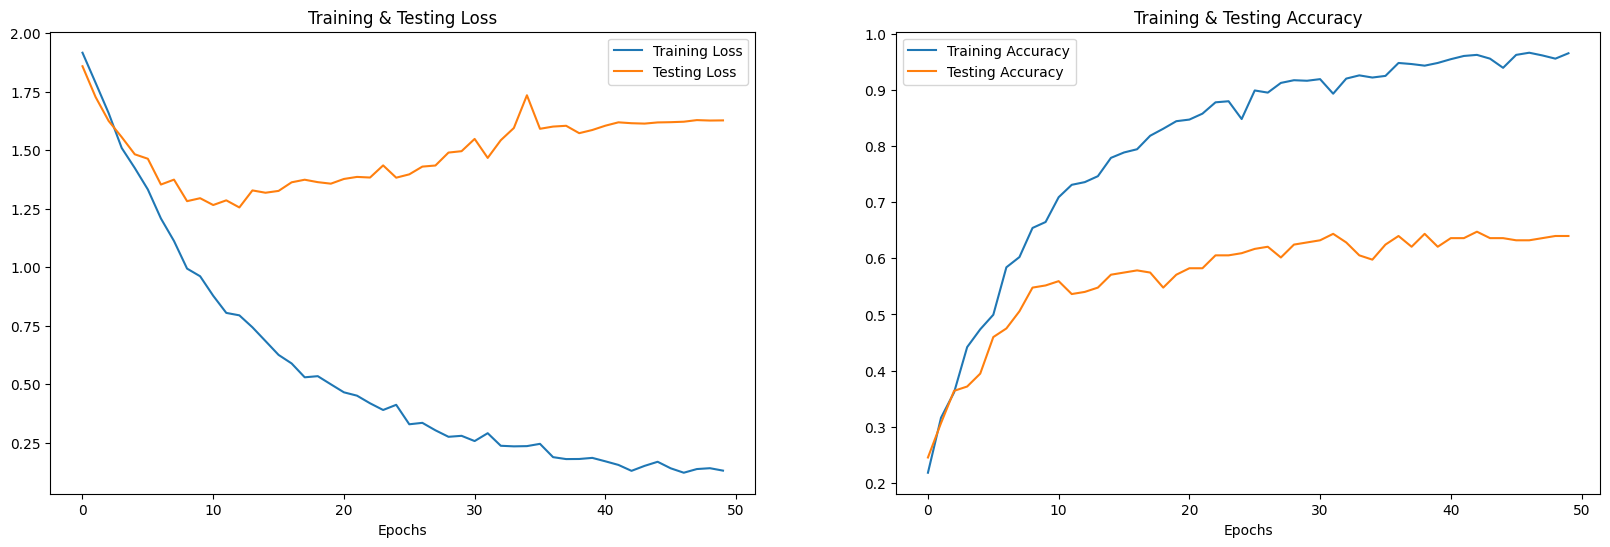

In [11]:
fct_model.display_results(model_train, history, x_test, y_test)

In [12]:
y_pred, y_test = fct_model.predict_on_test(model_train, encoder, x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [13]:
fct_model.show_predictions(y_pred, y_test)

  Predicted Labels Actual Labels
0                S             S
1                P             P
2                N             N
3                N             N
4                J             J
5                D             N
6                T             N
7                P             P
8                P             P
9                D             D


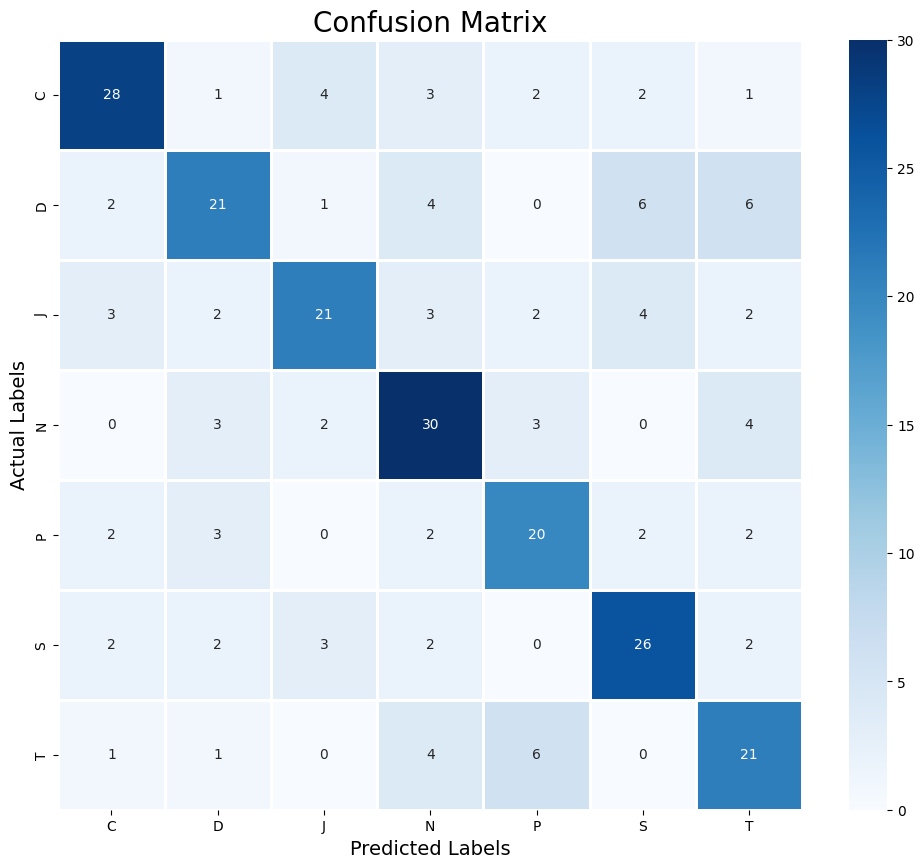

In [14]:
fct_model.show_conf_matrix(y_pred, y_test, encoder)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.74      0.68      0.71        41
           D       0.64      0.53      0.58        40
           J       0.68      0.57      0.62        37
           N       0.62      0.71      0.67        42
           P       0.61      0.65      0.62        31
           S       0.65      0.70      0.68        37
           T       0.55      0.64      0.59        33

    accuracy                           0.64       261
   macro avg       0.64      0.64      0.64       261
weighted avg       0.64      0.64      0.64       261



Test single audio with saved model

In [16]:
import librosa
import dill

with open("../artifacts/extract_features.pkl", "rb") as f:
    extract_features_test = dill.load(f)
    
data, sample_rate = librosa.load("../data/raw/OréauFR_01/f/sessd/10a01Da.wav", duration=4, offset=0.6)
test = extract_features_test(data, sample_rate)

In [17]:
test.shape

(162,)

In [18]:
import numpy as np

scaled_test = scaler.transform(test.reshape(1, 162))
new_test = scaled_test.reshape(1, 162, 1)
pred = model_train.predict(new_test)
predicted_class_index = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [19]:
encoder.inverse_transform(pred)[0][0]

'D'

In [20]:
#test de la fonction train_save_model
cnn2, history2 = fct_model.train_save_model("../data/ref_data.csv", "../artifacts")

Epoch 1/50
21/21 - 1s - 63ms/step - accuracy: 0.2258 - loss: 1.8845 - learning_rate: 0.0010
Epoch 2/50
21/21 - 0s - 17ms/step - accuracy: 0.3456 - loss: 1.7197 - learning_rate: 0.0010
Epoch 3/50
21/21 - 0s - 18ms/step - accuracy: 0.4217 - loss: 1.5500 - learning_rate: 0.0010
Epoch 4/50
21/21 - 0s - 18ms/step - accuracy: 0.4724 - loss: 1.4112 - learning_rate: 0.0010
Epoch 5/50
21/21 - 0s - 17ms/step - accuracy: 0.5376 - loss: 1.2853 - learning_rate: 0.0010
Epoch 6/50
21/21 - 0s - 17ms/step - accuracy: 0.5814 - loss: 1.1539 - learning_rate: 0.0010
Epoch 7/50
21/21 - 0s - 17ms/step - accuracy: 0.6221 - loss: 1.0686 - learning_rate: 0.0010
Epoch 8/50
21/21 - 0s - 18ms/step - accuracy: 0.6490 - loss: 0.9804 - learning_rate: 0.0010
Epoch 9/50
21/21 - 0s - 18ms/step - accuracy: 0.6843 - loss: 0.9016 - learning_rate: 0.0010
Epoch 10/50
21/21 - 0s - 17ms/step - accuracy: 0.7166 - loss: 0.8266 - learning_rate: 0.0010
Epoch 11/50
21/21 - 0s - 18ms/step - accuracy: 0.7381 - loss: 0.7344 - learning

In [21]:
with open("../artifacts/extract_features.pkl", "rb") as f:
    extract_features_test = dill.load(f)
    
data, sample_rate = librosa.load("../data/raw/OréauFR_01/m/sessj/07a01Ja.wav", duration=2.5, offset=0.6)
test = extract_features_test(data, sample_rate)

In [22]:
scaled_test = scaler.transform(test.reshape(1, 162))
new_test = scaled_test.reshape(1, 162, 1)
pred = model_train.predict(new_test)
predicted_class_index = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [23]:
encoder.inverse_transform(pred)[0][0]

'J'

In [24]:
prediction = fct_model.predict_on_audio(model_train, encoder, scaler, data, sample_rate)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [25]:
prediction

{'prediction': 'Joie 😁\u200b'}